In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [42]:
# First, let's read a small portion of the data to check column names and structure
rnaseq_preview = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/tcga.brca.rnaseq.unstranded.raw.counts.matrix-2.txt', 
                            sep='\t', 
                            nrows=5)  # Read just first 5 rows to preview

# Create a dictionary of dtypes - all count columns as integers
dtype_dict = {col: 'int32' for col in rnaseq_preview.columns if col != rnaseq_preview.index.name}

# Now read the full data with specified dtypes
rnaseq_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/tcga.brca.rnaseq.unstranded.raw.counts.matrix-2.txt', 
                        sep='\t', 
                        index_col=0,
                        dtype=dtype_dict)

# For the soft labels file, we'd need to know its structure
# Let's preview it first
soft_labels_preview = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/soft_label.tsv', 
                                 sep='\t', 
                                 nrows=5)

print("\nPreview of soft labels data types:")
print(soft_labels_preview.dtypes)

# We can then specify appropriate dtypes based on the content
# Would you like me to help specify dtypes for the soft labels file once we see its structure?

ValueError: Integer column has NA values in column 0

In [25]:
# import data
brca_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/soft_label.tsv', sep='\t', index_col=0)
rnaseq_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/tcga.brca.rnaseq.unstranded.raw.counts.matrix-2.txt', sep='\t', index_col=0)


/var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/ipykernel_91025/2209426547.py:3: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,2

In [26]:
print(brca_df.shape)
rnaseq_df.head()

(857, 41)


,Case ID,Sample ID,Sample Type,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,...,AL451106.1,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6
NaN,Case ID,Sample ID,Sample Type,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,...,AL451106.1,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6
0.0,TCGA-E9-A1RH,TCGA-E9-A1RH-01A,Primary Tumor,324,0,6231,661,695,333,2907,...,0,0,7,0,0,0,227,0,0,15
1.0,TCGA-C8-A26W,TCGA-C8-A26W-01A,Primary Tumor,4241,13,3226,1812,1306,591,4209,...,0,0,34,0,0,1,441,0,5,45
2.0,TCGA-E9-A1RH,TCGA-E9-A1RH-11A,Solid Tissue Normal,3573,770,1607,1040,215,573,13487,...,0,1,16,0,1,1,654,0,22,11
3.0,TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A,Primary Tumor,3627,176,1810,1598,573,676,4147,...,0,0,8,0,0,0,318,0,3,23


In [27]:

# Drop rows where event.BRCA1 is '1'
brca_df_filtered = brca_df[brca_df['event.BRCA1'] != '1']

# Drop rows where event.BRCA2 is 'Bi-allelic-undetermined'
brca_df_filtered = brca_df_filtered[brca_df_filtered['event.BRCA2'] != 'Bi-allelic-undetermined']

# Drop rows where event.PALB2 is '2'
brca_df_filtered = brca_df_filtered[brca_df_filtered['event.PALB2'] != '2']

# keep common samples

#idenfity the common samples

# Extract sample IDs from each dataframe
rnaseq_samples = set(rnaseq_df['Case ID'])
brca_samples = set(brca_df_filtered.index)

# Find the intersection of all sample IDs
common_samples = rnaseq_samples.intersection(brca_samples)

# Print the number of common samples
print("\nNumber of common samples:", len(common_samples))

# Drop samples that are not common in all three dataframes
rnaseq_df_common = rnaseq_df[rnaseq_df['Case ID'].isin(common_samples)]
brca_df_common = brca_df_filtered[brca_df_filtered.index.isin(common_samples)]

# Print the shapes of the new dataframes
print("rnaseq_df_common:", rnaseq_df_common.shape)
print("brca_df_common:", brca_df_common.shape)


Number of common samples: 857
rnaseq_df_common: (921, 60663)
brca_df_common: (857, 41)


In [28]:
# Check for duplicates in rnaseq_df_common's Case ID
print("Duplicate Case IDs in rnaseq_df:", rnaseq_df_common['Case ID'].duplicated().sum())

# Drop duplicates in rnaseq_df_common if any
rnaseq_df_common = rnaseq_df_common.drop_duplicates(subset=['Case ID'])

# Verify the shapes after removing duplicates
print("\nAfter removing duplicates:")
print("rnaseq_df_common:", rnaseq_df_common.shape)
print("brca_df_common:", brca_df_common.shape)

# Verify that we have exactly the same samples in both dataframes
rnaseq_samples = set(rnaseq_df_common['Case ID'])
brca_samples = set(brca_df_common.index)
print("\nSamples match:", rnaseq_samples == brca_samples)
print("Number of samples in each:", len(rnaseq_samples), len(brca_samples))

rnaseq_df_common.set_index('Case ID', inplace=True)
rnaseq_df_common.head()

Duplicate Case IDs in rnaseq_df: 64

After removing duplicates:
rnaseq_df_common: (857, 60663)
brca_df_common: (857, 41)

Samples match: True
Number of samples in each: 857 857


,Sample ID,Sample Type,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,AL451106.1,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6
Case ID,,,,,,,,,,,,,,,,,,,,,
TCGA-E9-A1RH,TCGA-E9-A1RH-01A,Primary Tumor,324,0,6231,661,695,333,2907,1663,...,0,0,7,0,0,0,227,0,0,15
TCGA-C8-A26W,TCGA-C8-A26W-01A,Primary Tumor,4241,13,3226,1812,1306,591,4209,6056,...,0,0,34,0,0,1,441,0,5,45
TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A,Primary Tumor,3627,176,1810,1598,573,676,4147,2548,...,0,0,8,0,0,0,318,0,3,23
TCGA-BH-A0HO,TCGA-BH-A0HO-01A,Primary Tumor,292,9,2038,2101,447,639,2327,2704,...,0,0,11,0,0,0,431,0,3,59
TCGA-BH-A18F,TCGA-BH-A18F-01A,Primary Tumor,2146,567,1677,1705,896,456,3763,1223,...,0,0,11,0,0,0,473,0,3,51


In [29]:

# Sort the samples in both dataframes by index
rnaseq_df_common = rnaseq_df_common.sort_index()
brca_df_common = brca_df_common.sort_index()

# Verify indices match exactly
indices_match = (rnaseq_df_common.index == brca_df_common.index).all()
print("\nIndices match exactly:", indices_match)



Indices match exactly: True


In [30]:
print(brca_df_common.shape)
brca_df_common.head()

(857, 41)


,HRD,Telomeric AI,LST,HRD-sum,BRCA1_somatic_null,BRCA1_germ_bi_allelic,BRCA1_germ_mono_allelic,BRCA1_deletion,BRCA1_epigenetic_silencing,BRCA1_mRNA,...,event.BRCA2,event.RAD51C,event.PALB2,event.All Events,event.PAM50,event.TNBC,HRD_status_base,HRD_adjust,soft_prob,Confidence
sample,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SB,0,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,NaN,0,HR,HRP,0.00000,0.002473
TCGA-A1-A0SD,10,10,7,27,0,0,0.0,0,0,0,...,0,0,0,0,LumA,0,HR,HRP ambiguous,0.48875,0.354344
TCGA-A1-A0SE,6,6,1,13,0,0,0.0,0,0,0,...,0,0,0,0,LumA,0,HR,HRP ambiguous,0.13875,0.032295
TCGA-A1-A0SF,7,11,8,26,0,0,0.0,0,0,0,...,0,0,0,0,LumA,0,HR,HRP ambiguous,0.48000,0.310026
TCGA-A1-A0SG,3,2,4,9,0,0,0.0,0,0,0,...,0,0,0,0,LumA,0,HR,HRP,0.00000,0.014774


In [31]:
print(rnaseq_df_common.shape)
rnaseq_df_common.head()

(857, 60662)


,Sample ID,Sample Type,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,AL451106.1,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6
Case ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SB,TCGA-A1-A0SB-01A,Primary Tumor,4148,604,1194,996,337,111,9044,788,...,0,0,24,0,0,0,218,0,11,26
TCGA-A1-A0SD,TCGA-A1-A0SD-01A,Primary Tumor,2477,50,2775,1430,375,412,4946,3367,...,0,0,25,0,0,0,352,0,2,19
TCGA-A1-A0SE,TCGA-A1-A0SE-01A,Primary Tumor,5089,24,1563,1769,1308,207,2857,1292,...,0,0,16,0,0,0,617,0,3,30
TCGA-A1-A0SF,TCGA-A1-A0SF-01A,Primary Tumor,8999,9,1624,1263,453,577,2732,1417,...,0,0,19,0,0,0,434,0,4,32
TCGA-A1-A0SG,TCGA-A1-A0SG-01A,Primary Tumor,2985,4,1746,999,398,366,3071,2125,...,0,0,17,0,0,0,469,0,4,47


In [32]:
# filter to top 2 percent of differentially expressed genes
deseq_results=pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/deseq_bottom_2_percent.tsv', sep = '\t', index_col=0)



deseq_results.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000163975.12|MELTF|protein_coding,4.223192,2.197306,0.122265,17.971715,3.245282e-72,6.764141e-68
ENSG00000115163.15|CENPA|protein_coding,4.405742,1.489792,0.087457,17.034565,4.551128e-65,4.742959e-61
ENSG00000107937.19|GTPBP4|protein_coding,13.539092,0.820738,0.048266,17.004536,7.600421e-65,5.280519e-61
ENSG00000136943.11|CTSV|protein_coding,2.170985,1.952020,0.120999,16.132475,1.508526e-58,7.860554e-55
ENSG00000140545.15|MFGE8|protein_coding,31.920965,1.701760,0.106421,15.990768,1.481928e-57,6.177567e-54


In [33]:

# Filter columns in rna_seq_df based on deseq_results row indices
deseq_filtered_rna_seq_df = rnaseq_df_common[[col for col in rnaseq_df_common.columns if col in deseq_results.index]]
print(deseq_filtered_rna_seq_df.shape)
deseq_filtered_rna_seq_df.head()

(857, 0)


""
Case ID
TCGA-A1-A0SB
TCGA-A1-A0SD
TCGA-A1-A0SE
TCGA-A1-A0SF
TCGA-A1-A0SG


In [34]:
#Filter to top 2% of all protein genes
#drop non-protein coding genes

# Step 1: Filter for protein coding genes (from your original code)
columns_to_keep = ['Sample ID', 'Sample Type']
gene_columns = [col for col in rnaseq_df_common.columns if col not in columns_to_keep]
protein_coding_cols = [col for col in gene_columns if 'protein_coding' in col]
final_columns = columns_to_keep + protein_coding_cols
pcg_rnaseq_df_filtered = rnaseq_df_common[final_columns]


# Step 2: Calculate mean expression for each gene
# First, separate metadata columns from gene expression columns
gene_expression = pcg_rnaseq_df_filtered[protein_coding_cols]
metadata = pcg_rnaseq_df_filtered[columns_to_keep]


# Calculate mean expression for each gene
gene_means = gene_expression.mean(axis=0)

# Calculate number of genes to keep (top 2%)
n_genes_to_keep = 400

# Get the column names (genes) with highest mean expression
top_genes = gene_means.nlargest(n_genes_to_keep).index

# Create final dataframe with metadata and top genes
pcg_400_with_metadata = pd.concat([metadata, pcg_rnaseq_df_filtered[top_genes]], axis=1)

# Create final dataframe with only top genes
pcg_400 = pcg_rnaseq_df_filtered[top_genes]

# Print information about the filtering
print("Original number of protein coding genes:", len(protein_coding_cols))
print("Number of top genes kept (2%):", n_genes_to_keep)
print("\nDataframe shapes:")
print("Original:", rnaseq_df.shape)
print("After protein coding filter:", pcg_rnaseq_df_filtered.shape)
print("Final (with top 2% genes) with metadata:", pcg_400_with_metadata.shape)
print("Final (with top 2% genes):", pcg_400.shape)



# Optional: Show summary statistics of the mean expression values
print("\nMean expression summary for top genes:")
print(gene_means[top_genes].describe())

# Save results to new dataframe
rnaseq_df_top_genes = pcg_400

# Optional: verify that our key columns are still present
print("\nChecking if key columns are present:")
for col in columns_to_keep:
    print(f"{col} present: {col in rnaseq_df_top_genes.columns}")

Original number of protein coding genes: 0
Number of top genes kept (2%): 400

Dataframe shapes:
Original: (1232, 60663)
After protein coding filter: (857, 2)
Final (with top 2% genes) with metadata: (857, 2)
Final (with top 2% genes): (857, 0)

Mean expression summary for top genes:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

Checking if key columns are present:
Sample ID present: False
Sample Type present: False


In [35]:
rnaseq_df_top_genes.head()

""
Case ID
TCGA-A1-A0SB
TCGA-A1-A0SD
TCGA-A1-A0SE
TCGA-A1-A0SF
TCGA-A1-A0SG


In [36]:
#files to use for training/testing

#top 2% of expressed protein coding genes
rnaseq_df_top_genes.head()
print(rnaseq_df_top_genes.shape)

#top 2% of differentially expressed genes
deseq_filtered_rna_seq_df.head()
print(deseq_filtered_rna_seq_df.shape)

#metadata with soft labels
brca_df_common.head()
print(brca_df_common.shape)


(857, 0)
(857, 0)
(857, 41)


In [37]:
brca_df_common['Confidence'].value_counts()

Confidence
0.014774    29
0.012128    28
0.006693    27
0.017986    24
0.032295    24
            ..
0.999983     1
0.999991     1
0.999945     1
0.003684     1
0.999970     1
Name: count, Length: 91, dtype: int64

In [38]:
brca_df_common['HRD_status_base'].value_counts()

HRD_status_base
HR     652
HRD    205
Name: count, dtype: int64

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, mean_squared_error, r2_score, f1_score, recall_score, precision_score, matthews_corrcoef
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing Function
def preprocess_data(X, y, task='classification'):
    # Encode categorical labels
    if task == 'classification':
        le = LabelEncoder()
        y = le.fit_transform(y)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Model Training & Evaluation Function for Classification
def train_evaluate_classification_models(X_train, X_test, y_train, y_test):
    models = {
        'Elastic Net': LogisticRegression(penalty='elasticnet', solver='saga', 
                                        l1_ratio=0.5, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    
    results = {}
    plt.figure(figsize=(10, 8))
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Get predictions
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        
        # Store results
        results[name] = {
            'AUC': roc_auc,
            'Confusion Matrix': confusion_matrix(y_test, y_pred),
            'Classification Report': classification_report(y_test, y_pred)
        }
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Classification Models')
    plt.legend(loc="lower right")
    plt.show()
    
    return results

# Main execution
def main():
    # For top 2% expressed genes
    print("Training models on top 2% expressed genes:")
    
    # Classification
    X_train_top, X_test_top, y_train_top, y_test_top = preprocess_data(
        rnaseq_df_top_genes, brca_df_common['HRD_status_base'], task='classification'
    )
    
    results_top = train_evaluate_classification_models(
        X_train_top, X_test_top, y_train_top, y_test_top
    )
    
    # For differentially expressed genes
    print("\nTraining models on differentially expressed genes:")
    
    X_train_de, X_test_de, y_train_de, y_test_de = preprocess_data(
        deseq_filtered_rna_seq_df, brca_df_common['HRD_status_base'], task='classification'
    )
    
    results_de = train_evaluate_classification_models(
        X_train_de, X_test_de, y_train_de, y_test_de
    )
    
    # Print results
    print("\nResults for top 2% expressed genes:")
    for model_name, metrics in results_top.items():
        print(f"\n{model_name}:")
        print(f"AUC: {metrics['AUC']:.3f}")
        print("\nClassification Report:")
        print(metrics['Classification Report'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])
    
    print("\nResults for differentially expressed genes:")
    for model_name, metrics in results_de.items():
        print(f"\n{model_name}:")
        print(f"AUC: {metrics['AUC']:.3f}")
        print("\nClassification Report:")
        print(metrics['Classification Report'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])

# For regression task on Confidence values
def train_evaluate_regression_models(X_train, X_test, y_train, y_test):
    models = {
        'Elastic Net': ElasticNet(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Get predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results[name] = {
            'MSE': mse,
            'R2': r2
        }
        
        # Plot actual vs predicted
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Confidence')
        plt.ylabel('Predicted Confidence')
        plt.title(f'{name} - Actual vs Predicted')
        plt.show()
    
    return results

# Run regression models
def run_regression():
    print("\nTraining regression models for Confidence prediction:")
    
    # For top 2% expressed genes
    X_train_top, X_test_top, y_train_top, y_test_top = preprocess_data(
        rnaseq_df_top_genes, brca_df_common['Confidence'], task='regression'
    )
    
    results_top_reg = train_evaluate_regression_models(
        X_train_top, X_test_top, y_train_top, y_test_top
    )
    
    print("\nRegression Results for top 2% expressed genes:")
    for model_name, metrics in results_top_reg.items():
        print(f"\n{model_name}:")
        print(f"MSE: {metrics['MSE']:.6f}")
        print(f"R2: {metrics['R2']:.3f}")

main()
run_regression()

Training models on top 2% expressed genes:


ValueError: at least one array or dtype is required

Training models on top 2% expressed genes:


/opt/homebrew/Caskroom/miniconda/base/envs/hrdclas/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


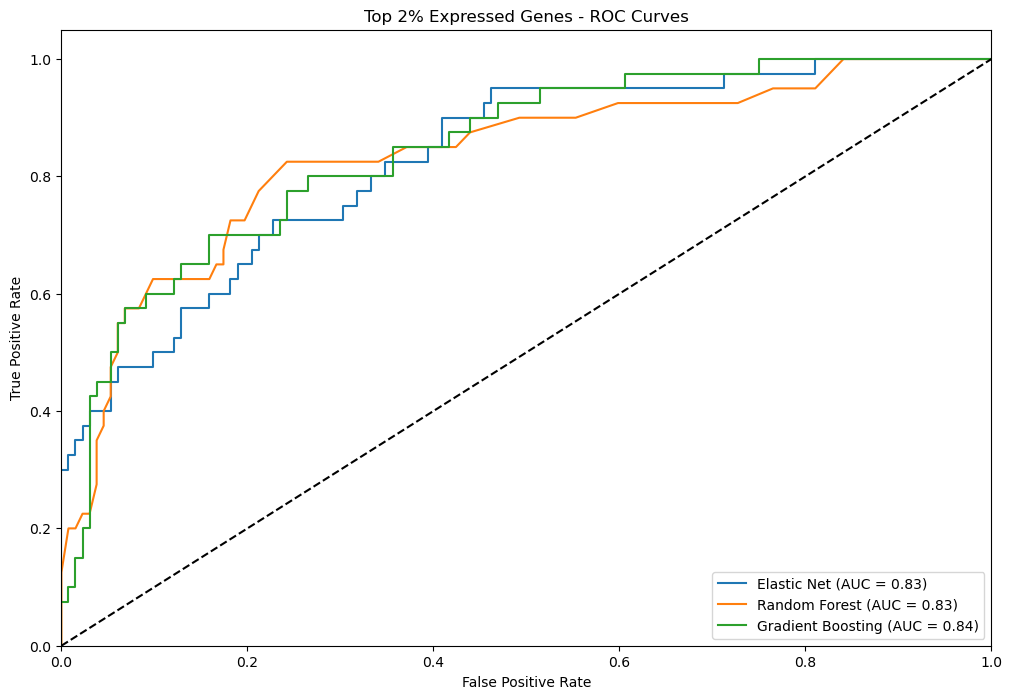

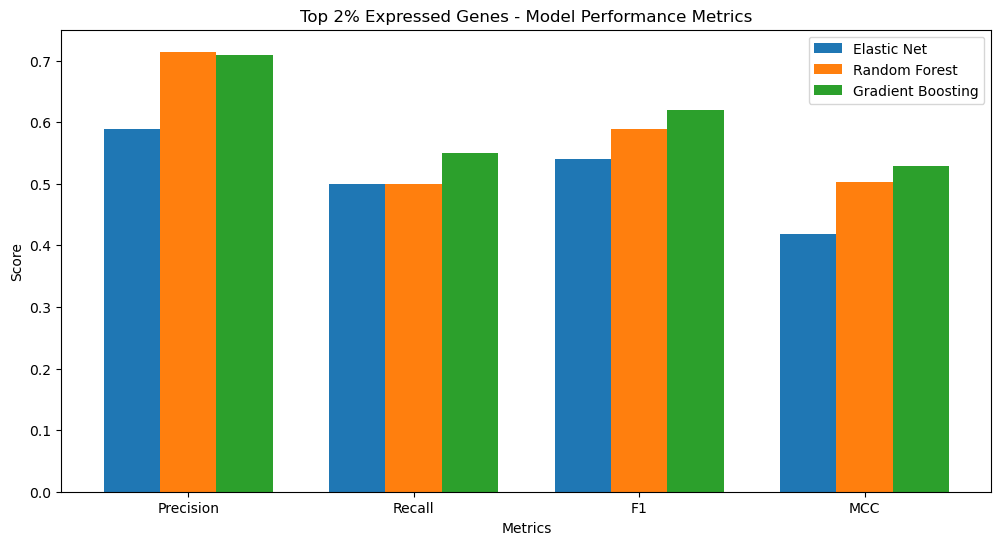

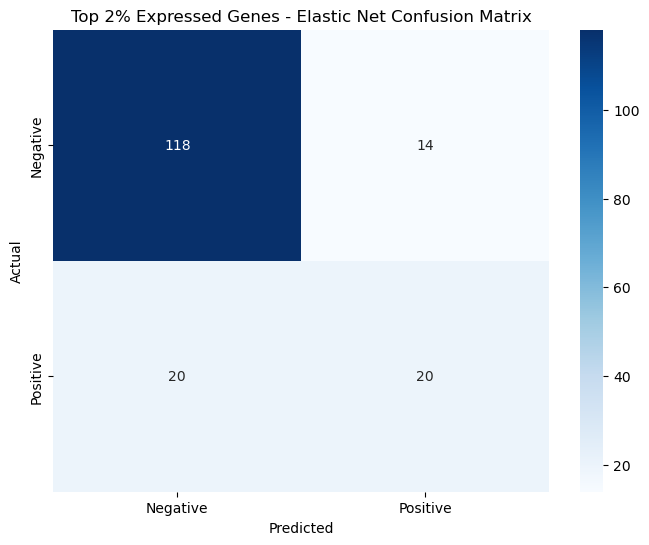

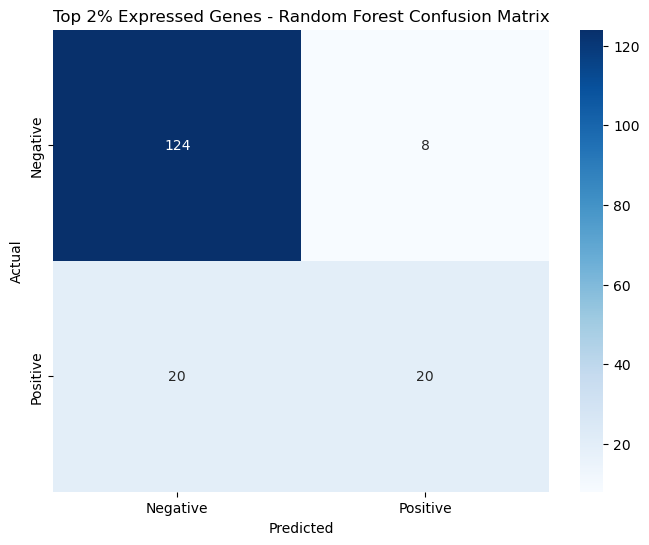

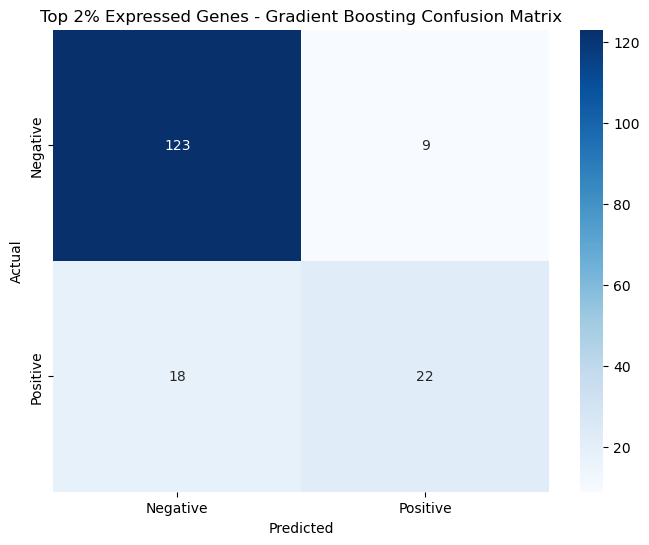


Training models on differentially expressed genes:


/opt/homebrew/Caskroom/miniconda/base/envs/hrdclas/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


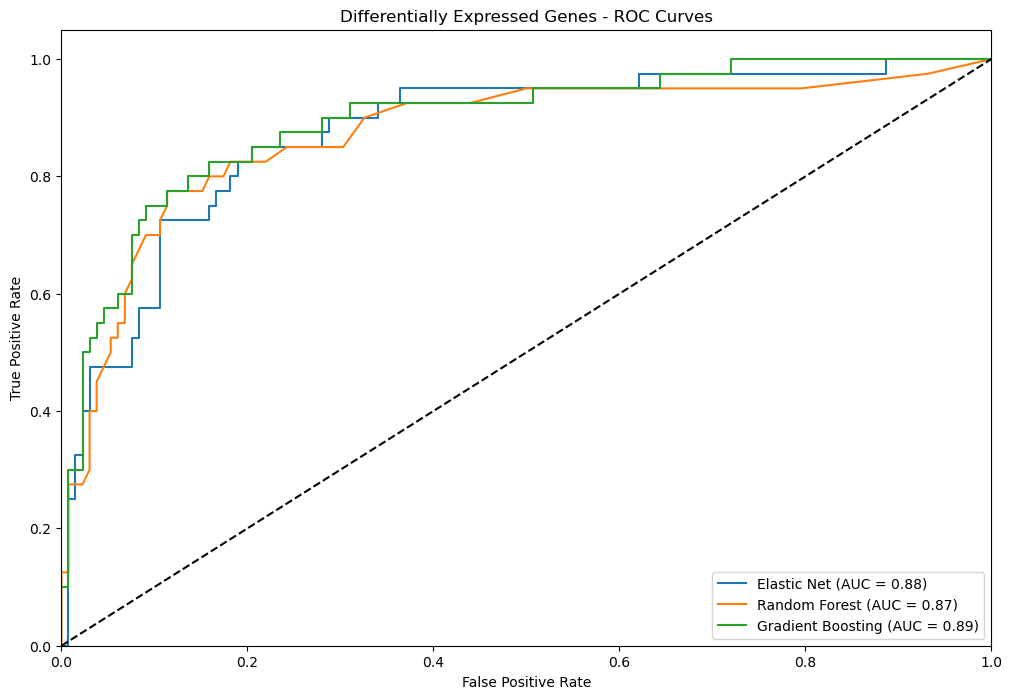

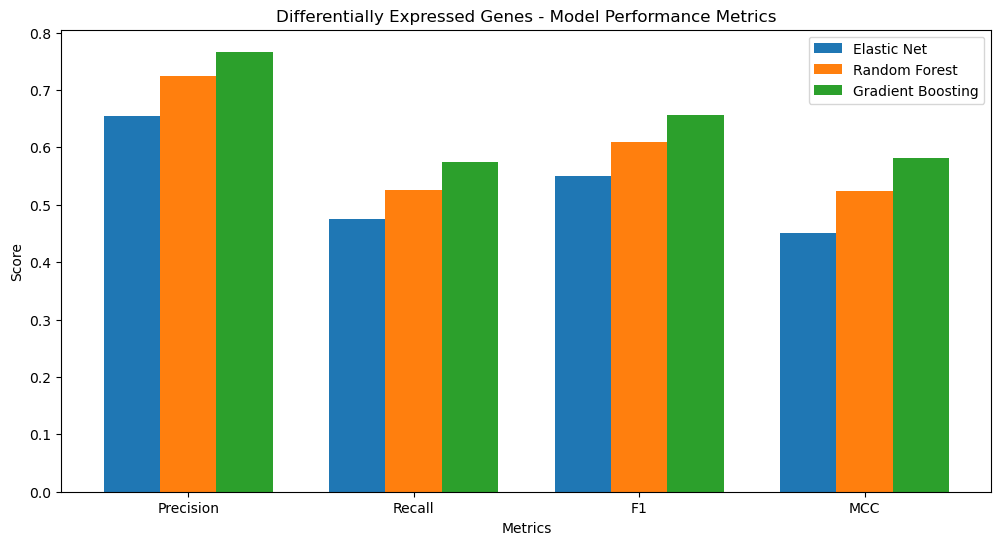

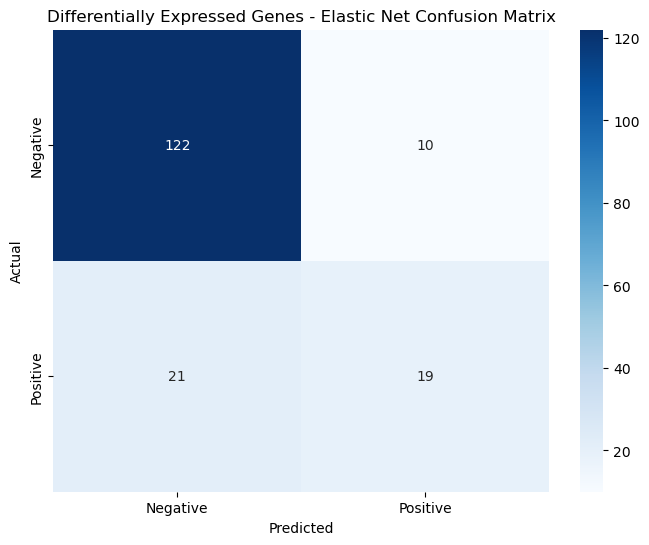

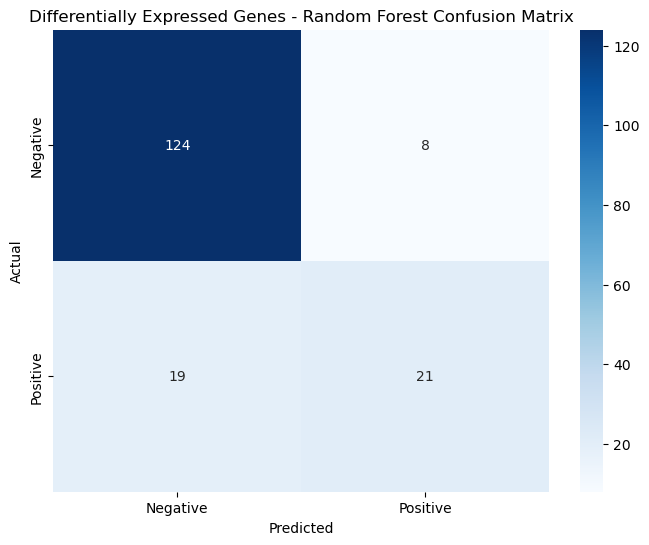

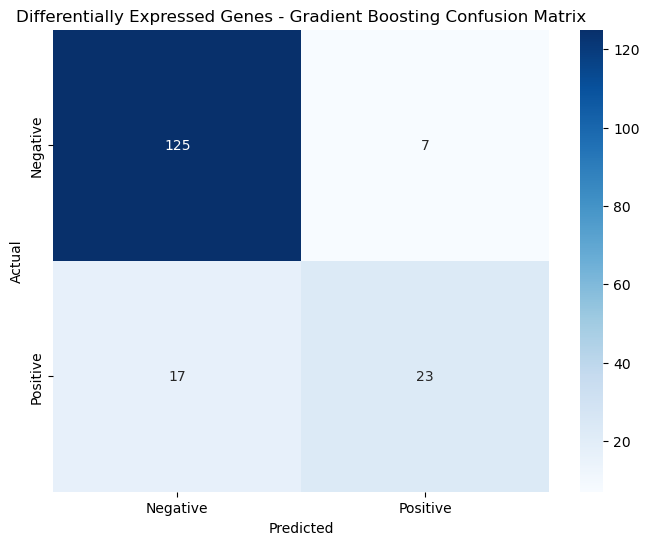


Results for Top 2% expressed genes:

Elastic Net:
Precision: 0.588
Recall: 0.500
F1: 0.541
MCC: 0.418
AUC: 0.829

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       132
           1       0.59      0.50      0.54        40

    accuracy                           0.80       172
   macro avg       0.72      0.70      0.71       172
weighted avg       0.79      0.80      0.80       172


Random Forest:
Precision: 0.714
Recall: 0.500
F1: 0.588
MCC: 0.503
AUC: 0.833

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       132
           1       0.71      0.50      0.59        40

    accuracy                           0.84       172
   macro avg       0.79      0.72      0.74       172
weighted avg       0.83      0.84      0.83       172


Gradient Boosting:
Precision: 0.710
Recall: 0.550
F1: 0.620
MCC: 0.530
AUC: 0.844

Classification Report

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (roc_curve, auc, confusion_matrix, classification_report,
                           precision_score, recall_score, f1_score, matthews_corrcoef)
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(X, y, task='classification'):
    if task == 'classification':
        le = LabelEncoder()
        y = le.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

def calculate_metrics(y_true, y_pred, y_pred_proba=None):
    metrics = {
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Confusion Matrix': confusion_matrix(y_true, y_pred),
        'Classification Report': classification_report(y_true, y_pred)
    }
    
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
        metrics['ROC'] = {'fpr': fpr, 'tpr': tpr, 'auc': auc(fpr, tpr)}
    
    return metrics

def plot_metrics(results, title_prefix=""):
    # Plot ROC curves
    plt.figure(figsize=(12, 8))
    for name, metrics in results.items():
        roc = metrics['ROC']
        plt.plot(roc['fpr'], roc['tpr'], 
                label=f'{name} (AUC = {roc["auc"]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title_prefix} ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

    # Plot other metrics as bar chart
    metrics_to_plot = ['Precision', 'Recall', 'F1', 'MCC']
    metrics_data = {
        name: [metrics[m] for m in metrics_to_plot] 
        for name, metrics in results.items()
    }
    
    plt.figure(figsize=(12, 6))
    x = np.arange(len(metrics_to_plot))
    width = 0.25
    
    for i, (model_name, values) in enumerate(metrics_data.items()):
        plt.bar(x + i*width, values, width, label=model_name)
    
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title(f'{title_prefix} Model Performance Metrics')
    plt.xticks(x + width, metrics_to_plot)
    plt.legend()
    plt.show()

    # Plot confusion matrices
    for name, metrics in results.items():
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.title(f'{title_prefix} {name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

def train_evaluate_classification_models(X_train, X_test, y_train, y_test):
    models = {
        'Elastic Net': LogisticRegression(penalty='elasticnet', solver='saga', 
                                        l1_ratio=0.5, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Get predictions
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        # Calculate all metrics
        results[name] = calculate_metrics(y_test, y_pred, y_pred_proba)
    
    return results

def main():
    # For top 2% expressed genes
    print("Training models on top 2% expressed genes:")
    X_train_top, X_test_top, y_train_top, y_test_top = preprocess_data(
        rnaseq_df_top_genes, brca_df_common['HRD_status_base']
    )
    
    results_top = train_evaluate_classification_models(
        X_train_top, X_test_top, y_train_top, y_test_top
    )
    plot_metrics(results_top, "Top 2% Expressed Genes -")
    
    # For differentially expressed genes
    print("\nTraining models on differentially expressed genes:")
    X_train_de, X_test_de, y_train_de, y_test_de = preprocess_data(
        deseq_filtered_rna_seq_df, brca_df_common['HRD_status_base']
    )
    
    results_de = train_evaluate_classification_models(
        X_train_de, X_test_de, y_train_de, y_test_de
    )
    plot_metrics(results_de, "Differentially Expressed Genes -")
    
    # Print detailed results
    for dataset_name, results in [("Top 2% expressed genes", results_top), 
                                ("Differentially expressed genes", results_de)]:
        print(f"\nResults for {dataset_name}:")
        for model_name, metrics in results.items():
            print(f"\n{model_name}:")
            print(f"Precision: {metrics['Precision']:.3f}")
            print(f"Recall: {metrics['Recall']:.3f}")
            print(f"F1: {metrics['F1']:.3f}")
            print(f"MCC: {metrics['MCC']:.3f}")
            print(f"AUC: {metrics['ROC']['auc']:.3f}")
            print("\nClassification Report:")
            print(metrics['Classification Report'])

if __name__ == "__main__":
    main()

Training models on expression deconvolution genes:


/opt/homebrew/Caskroom/miniconda/base/envs/hrdclas/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


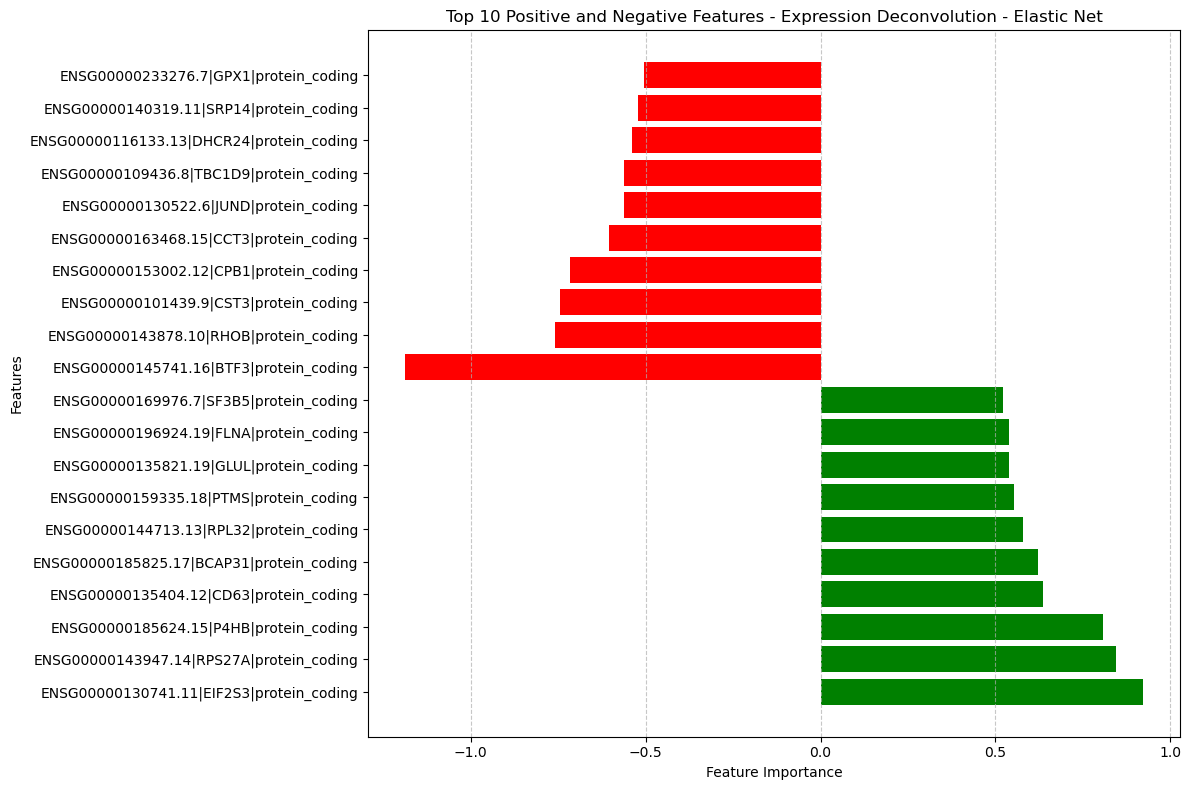


Top Features for Expression Deconvolution - Elastic Net:

Positive Features (Top 10):
                                 feature  importance
ENSG00000130741.11|EIF2S3|protein_coding    0.921319
ENSG00000143947.14|RPS27A|protein_coding    0.845874
  ENSG00000185624.15|P4HB|protein_coding    0.806827
  ENSG00000135404.12|CD63|protein_coding    0.637285
ENSG00000185825.17|BCAP31|protein_coding    0.622338
 ENSG00000144713.13|RPL32|protein_coding    0.578368
  ENSG00000159335.18|PTMS|protein_coding    0.552136
  ENSG00000135821.19|GLUL|protein_coding    0.539395
  ENSG00000196924.19|FLNA|protein_coding    0.538231
  ENSG00000169976.7|SF3B5|protein_coding    0.520946

Negative Features (Top 10):
                                 feature  importance
  ENSG00000145741.16|BTF3|protein_coding   -1.187382
  ENSG00000143878.10|RHOB|protein_coding   -0.757737
   ENSG00000101439.9|CST3|protein_coding   -0.744950
  ENSG00000153002.12|CPB1|protein_coding   -0.715939
  ENSG00000163468.15|CCT3|protein_co

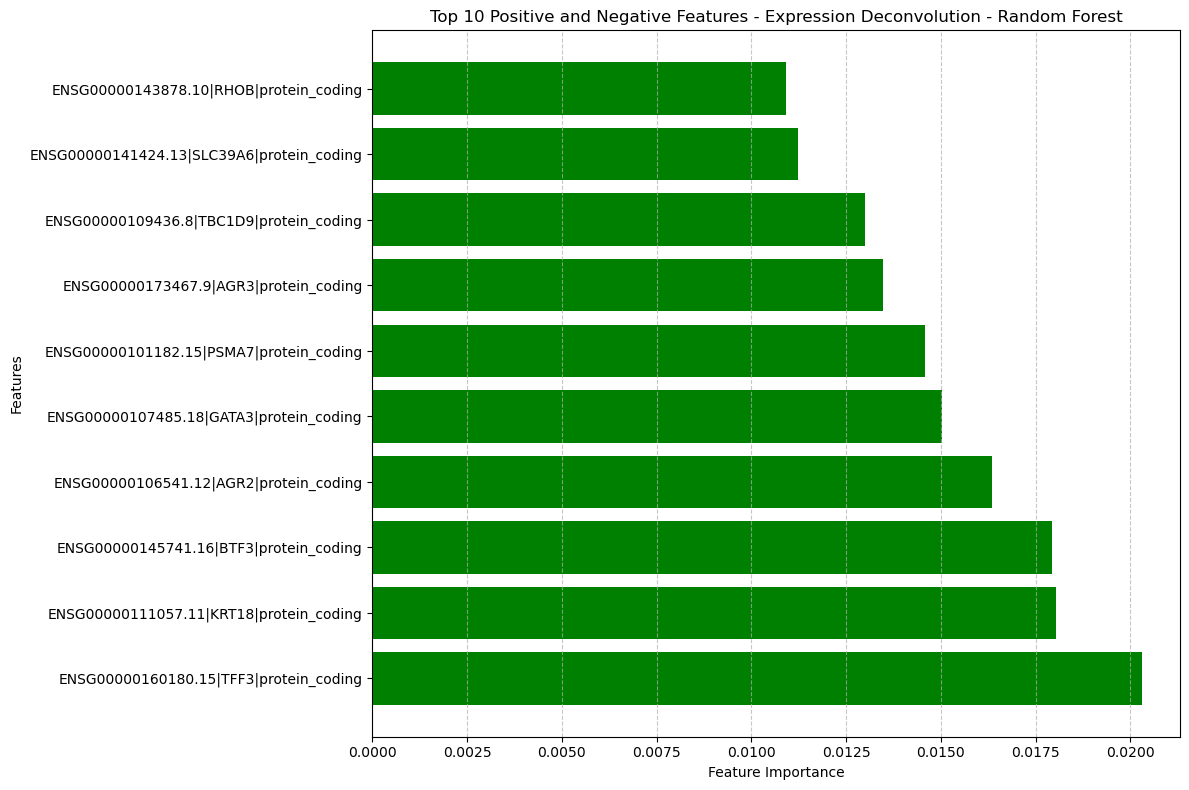


Top Features for Expression Deconvolution - Random Forest:

Positive Features (Top 10):
                                  feature  importance
   ENSG00000160180.15|TFF3|protein_coding    0.020297
  ENSG00000111057.11|KRT18|protein_coding    0.018049
   ENSG00000145741.16|BTF3|protein_coding    0.017942
   ENSG00000106541.12|AGR2|protein_coding    0.016345
  ENSG00000107485.18|GATA3|protein_coding    0.015030
  ENSG00000101182.15|PSMA7|protein_coding    0.014571
    ENSG00000173467.9|AGR3|protein_coding    0.013477
  ENSG00000109436.8|TBC1D9|protein_coding    0.012998
ENSG00000141424.13|SLC39A6|protein_coding    0.011220
   ENSG00000143878.10|RHOB|protein_coding    0.010924

Negative Features (Top 10):
Empty DataFrame
Columns: [feature, importance]
Index: []




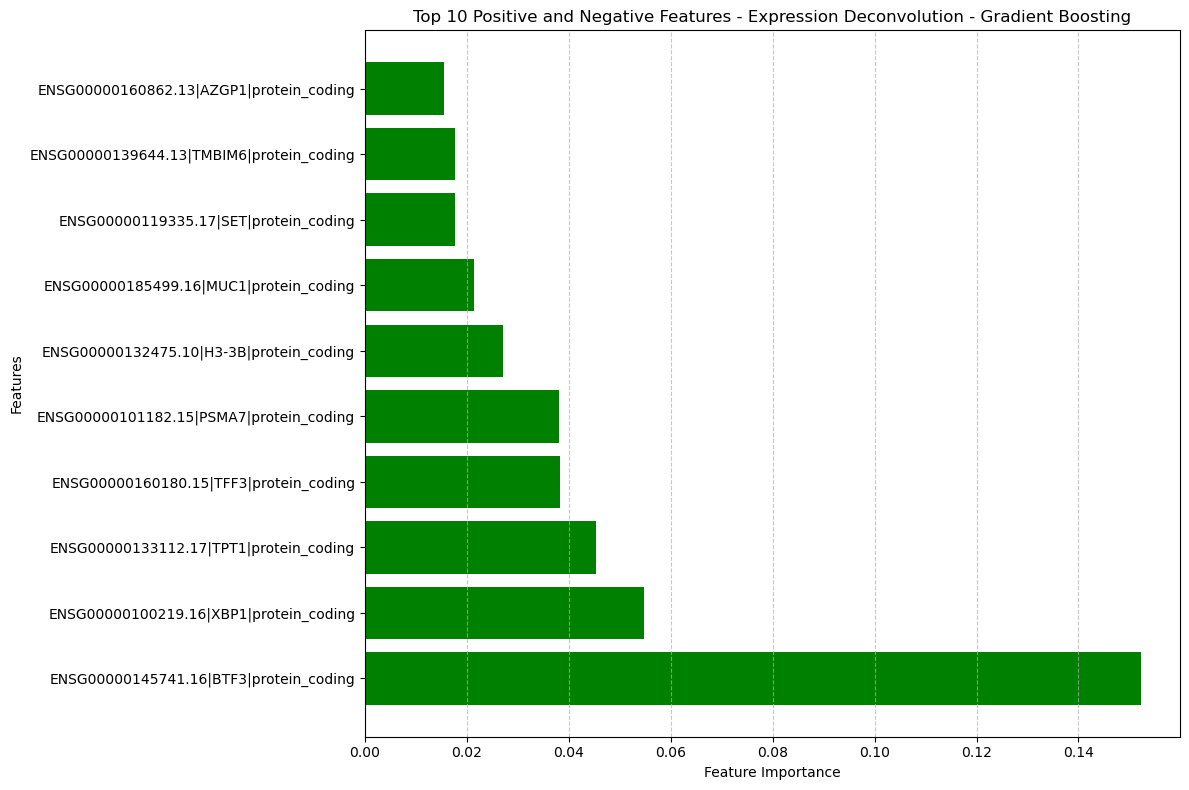


Top Features for Expression Deconvolution - Gradient Boosting:

Positive Features (Top 10):
                                 feature  importance
  ENSG00000145741.16|BTF3|protein_coding    0.152311
  ENSG00000100219.16|XBP1|protein_coding    0.054650
  ENSG00000133112.17|TPT1|protein_coding    0.045354
  ENSG00000160180.15|TFF3|protein_coding    0.038176
 ENSG00000101182.15|PSMA7|protein_coding    0.038021
 ENSG00000132475.10|H3-3B|protein_coding    0.027077
  ENSG00000185499.16|MUC1|protein_coding    0.021465
   ENSG00000119335.17|SET|protein_coding    0.017644
ENSG00000139644.13|TMBIM6|protein_coding    0.017580
 ENSG00000160862.13|AZGP1|protein_coding    0.015540

Negative Features (Top 10):
Empty DataFrame
Columns: [feature, importance]
Index: []




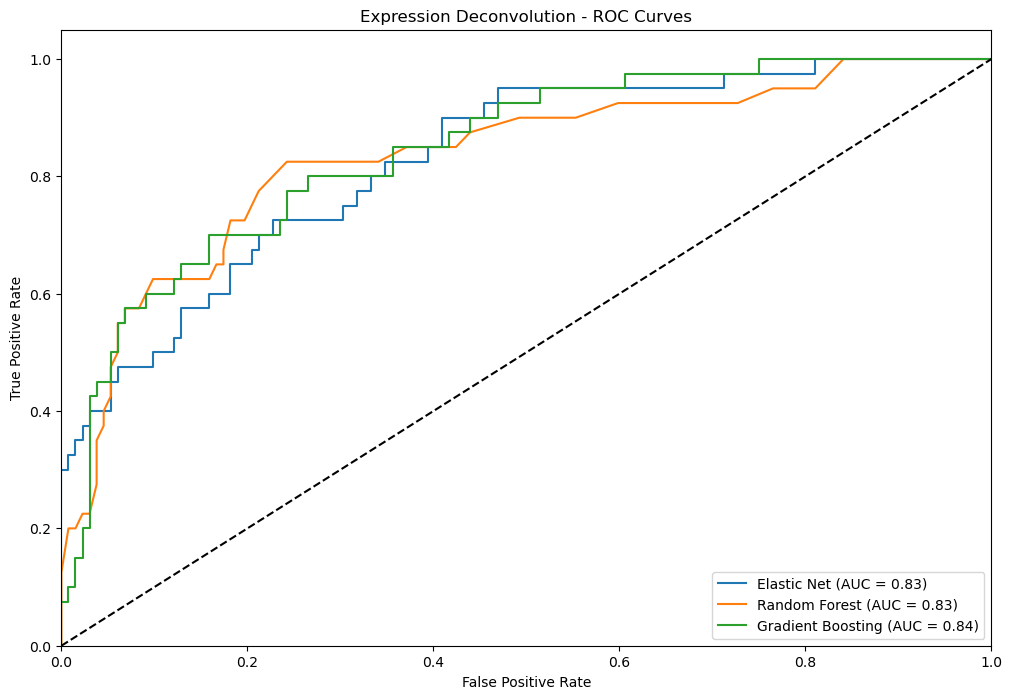

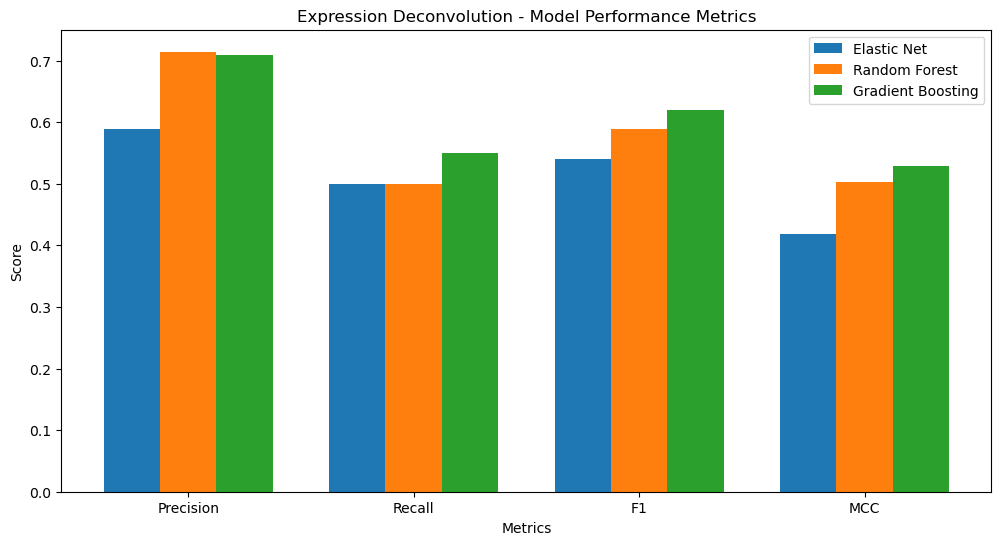

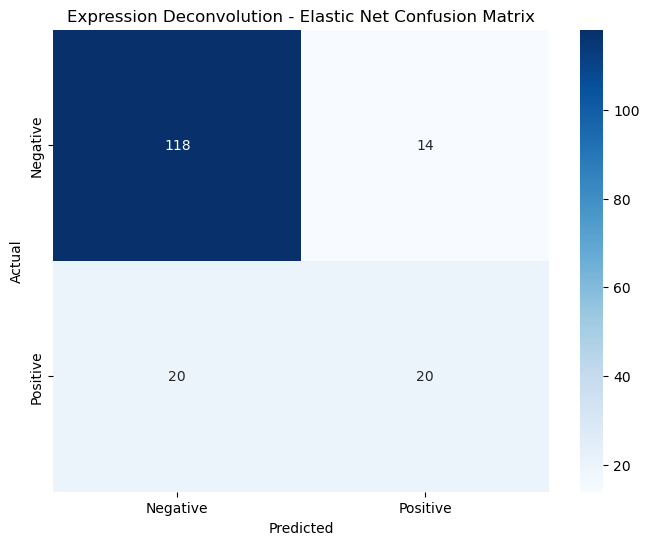

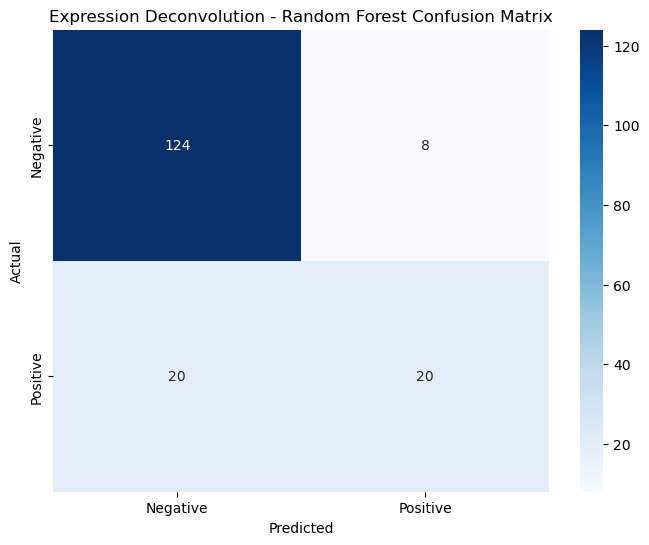

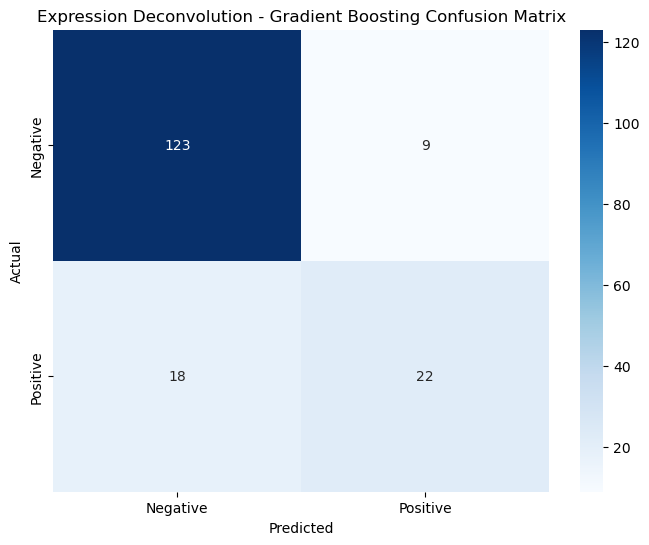


Results for Expression Deconvolution:

Elastic Net:
Precision: 0.588
Recall: 0.500
F1: 0.541
MCC: 0.418
AUC: 0.829

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       132
           1       0.59      0.50      0.54        40

    accuracy                           0.80       172
   macro avg       0.72      0.70      0.71       172
weighted avg       0.79      0.80      0.80       172


Random Forest:
Precision: 0.714
Recall: 0.500
F1: 0.588
MCC: 0.503
AUC: 0.833

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       132
           1       0.71      0.50      0.59        40

    accuracy                           0.84       172
   macro avg       0.79      0.72      0.74       172
weighted avg       0.83      0.84      0.83       172


Gradient Boosting:
Precision: 0.710
Recall: 0.550
F1: 0.620
MCC: 0.530
AUC: 0.844

Classification Repo

In [ ]:
def get_feature_importance(model, feature_names, model_name):
    if model_name == 'Elastic Net':
        # For logistic regression, use coefficients
        importance = model.coef_[0]
    elif model_name in ['Random Forest', 'Gradient Boosting']:
        # For tree-based models, use feature importances
        importance = model.feature_importances_
        
    # Create DataFrame with feature names and importance scores
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    })
    
    # Sort by absolute importance to get both positive and negative top features
    feature_importance['abs_importance'] = abs(feature_importance['importance'])
    feature_importance = feature_importance.sort_values('abs_importance', ascending=False)
    
    # Get top 10 positive and negative features
    top_positive = feature_importance[feature_importance['importance'] > 0].head(10)
    top_negative = feature_importance[feature_importance['importance'] < 0].head(10)
    
    return pd.concat([top_positive, top_negative])

def plot_top_features(top_features, model_name, dataset_name):
    plt.figure(figsize=(12, 8))
    
    # Create bar plot
    colors = ['green' if x > 0 else 'red' for x in top_features['importance']]
    bars = plt.barh(top_features['feature'], top_features['importance'], color=colors)
    
    # Customize plot
    plt.title(f'Top 10 Positive and Negative Features - {dataset_name} - {model_name}')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    
    # Add gridlines
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    # Adjust layout
    plt.tight_layout()
    
    return plt

def train_evaluate_classification_models(X_train, X_test, y_train, y_test, feature_names, dataset_name):
    models = {
        'Elastic Net': LogisticRegression(penalty='elasticnet', solver='saga', 
                                        l1_ratio=0.5, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Get predictions
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        # Calculate all metrics
        results[name] = calculate_metrics(y_test, y_pred, y_pred_proba)
        
        # Get and plot feature importance
        top_features = get_feature_importance(model, feature_names, name)
        plot_top_features(top_features, name, dataset_name)
        plt.show()
        
        # Print feature importance values
        print(f"\nTop Features for {dataset_name} - {name}:")
        print("\nPositive Features (Top 10):")
        positive_features = top_features[top_features['importance'] > 0].sort_values('importance', ascending=False)
        print(positive_features[['feature', 'importance']].to_string(index=False))
        
        print("\nNegative Features (Top 10):")
        negative_features = top_features[top_features['importance'] < 0].sort_values('importance')
        print(negative_features[['feature', 'importance']].to_string(index=False))
        print("\n" + "="*50 + "\n")
    
    return results

def main():
    # For top 2% expressed genes
    print("Training models on expression deconvolution genes:")
    X_train_top, X_test_top, y_train_top, y_test_top = preprocess_data(
        rnaseq_df_top_genes, brca_df_common['HRD_status_base']
    )
    
    feature_names_top = rnaseq_df_top_genes.columns.tolist()
    results_top = train_evaluate_classification_models(
        X_train_top, X_test_top, y_train_top, y_test_top, 
        feature_names_top, "Expression Deconvolution"
    )
    plot_metrics(results_top, "Expression Deconvolution -")
    
    # Print detailed results
    for dataset_name, results in [("Expression Deconvolution", results_top)]:
        print(f"\nResults for {dataset_name}:")
        for model_name, metrics in results.items():
            print(f"\n{model_name}:")
            print(f"Precision: {metrics['Precision']:.3f}")
            print(f"Recall: {metrics['Recall']:.3f}")
            print(f"F1: {metrics['F1']:.3f}")
            print(f"MCC: {metrics['MCC']:.3f}")
            print(f"AUC: {metrics['ROC']['auc']:.3f}")
            print("\nClassification Report:")
            print(metrics['Classification Report'])

if __name__ == "__main__":
    main()

Skipping nan due to insufficient samples or class imbalance


/opt/homebrew/Caskroom/miniconda/base/envs/hrdclas/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/hrdclas/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/hrdclas/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/hrdclas/lib/python3.12/site-packages

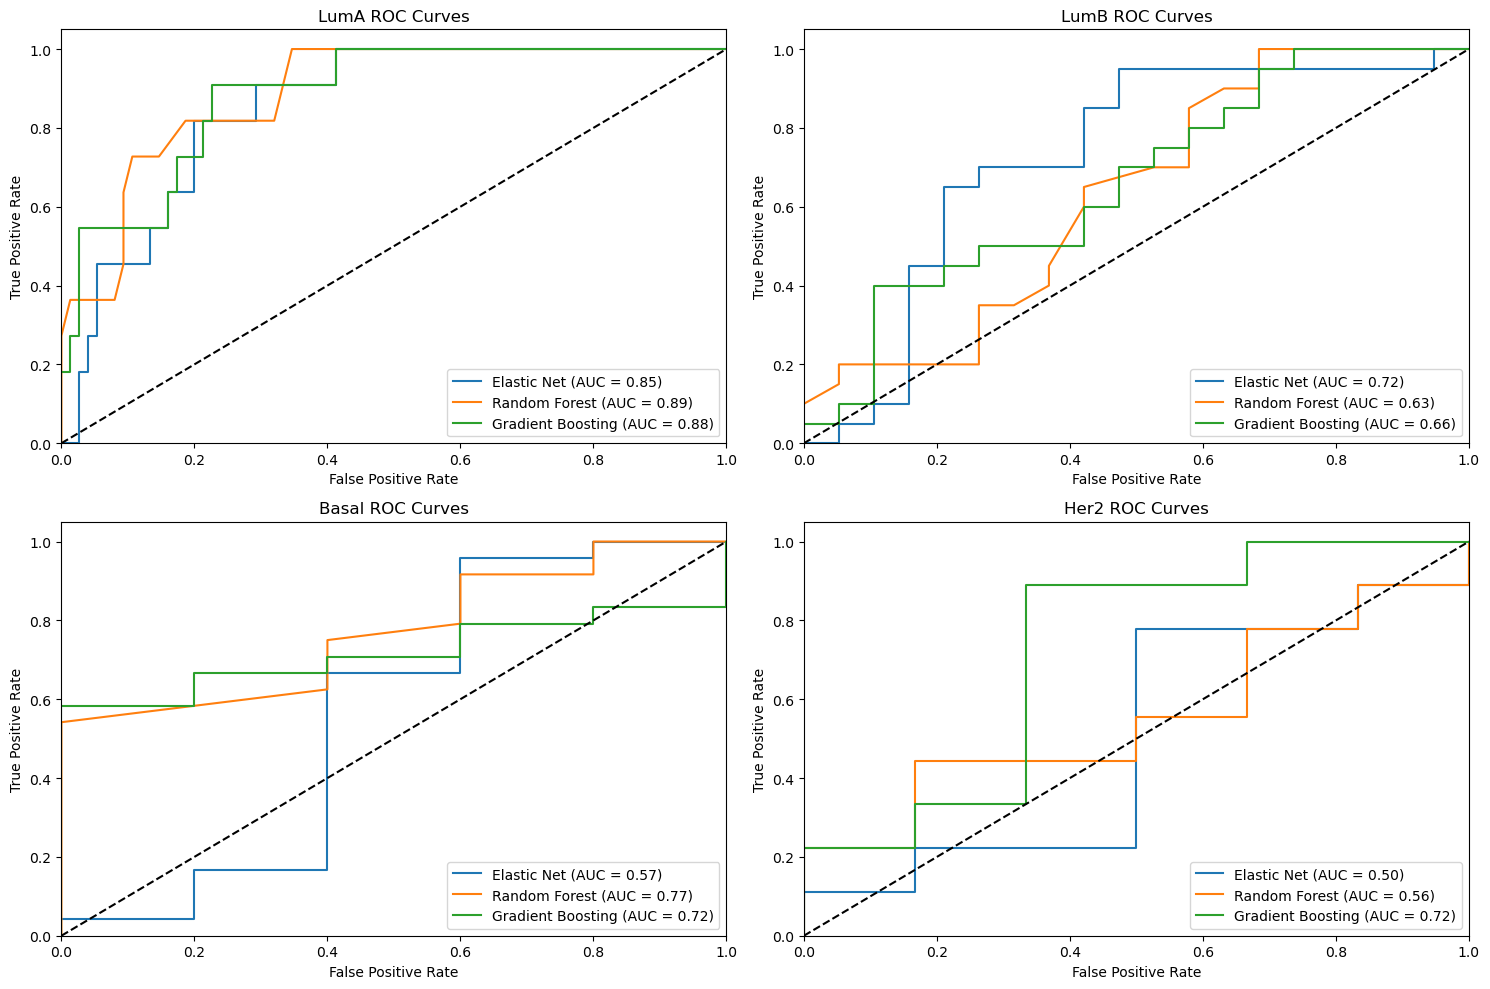

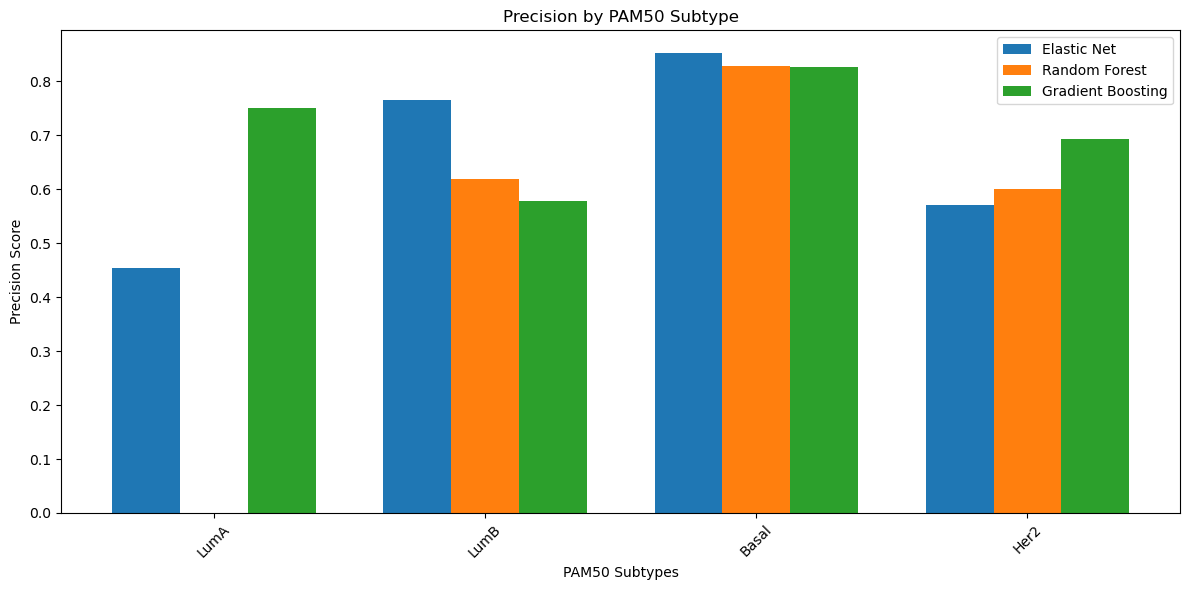

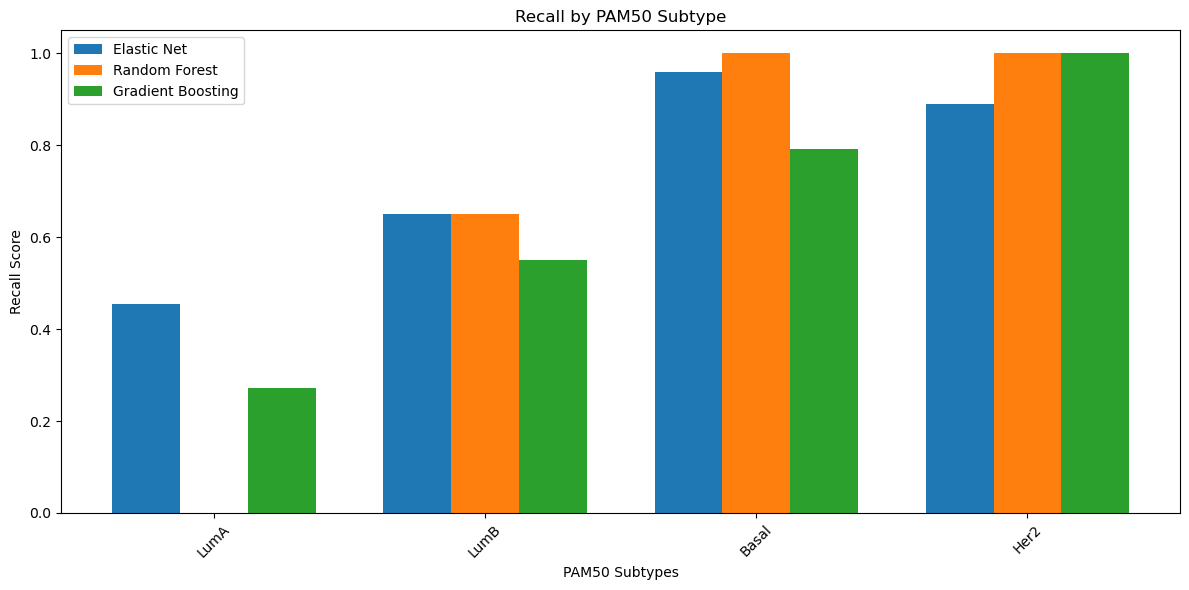

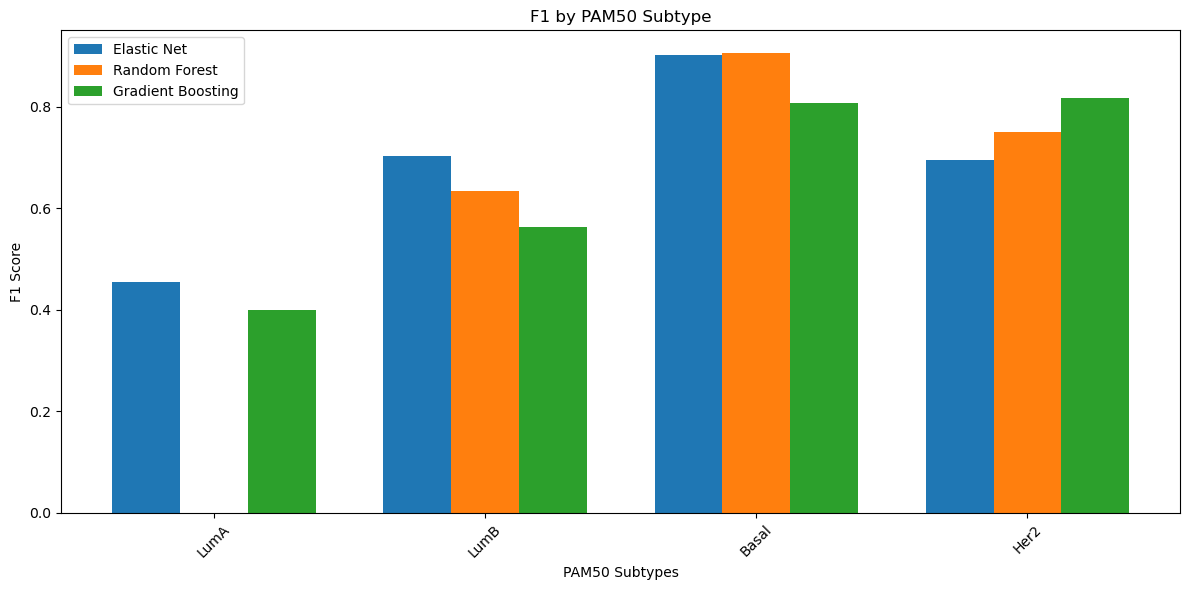

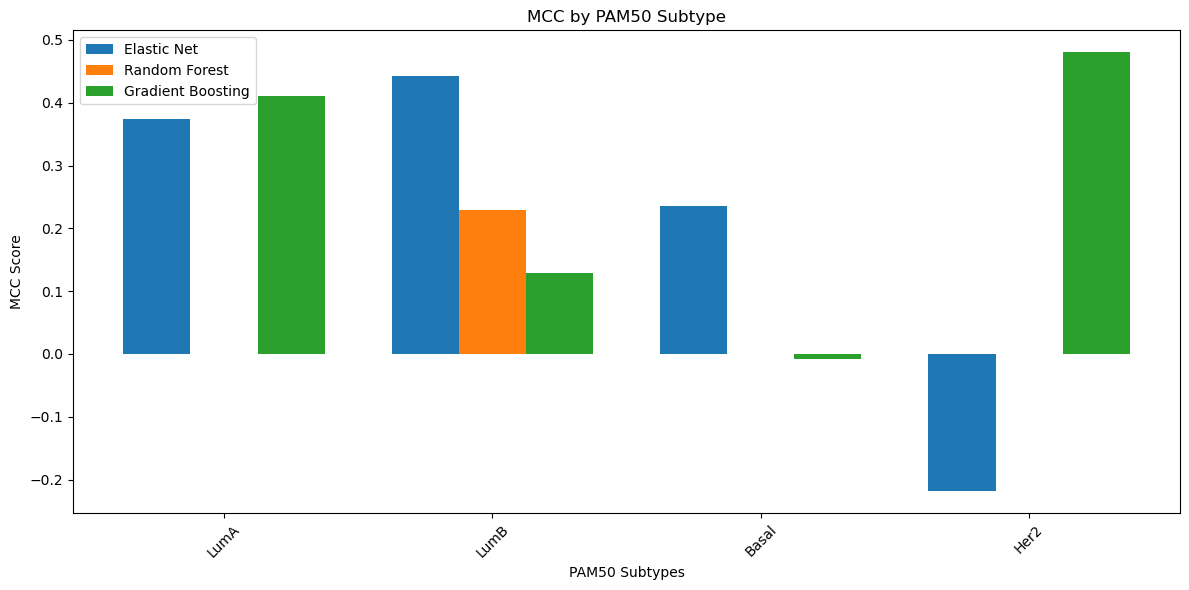


Results for LumA:
Number of samples: 430

Elastic Net:
Precision: 0.455
Recall: 0.455
F1: 0.455
MCC: 0.375
AUC: 0.855

Confusion Matrix:
[[69  6]
 [ 6  5]]

Random Forest:
Precision: 0.000
Recall: 0.000
F1: 0.000
MCC: 0.000
AUC: 0.890

Confusion Matrix:
[[75  0]
 [11  0]]

Gradient Boosting:
Precision: 0.750
Recall: 0.273
F1: 0.400
MCC: 0.411
AUC: 0.884

Confusion Matrix:
[[74  1]
 [ 8  3]]

Results for LumB:
Number of samples: 193

Elastic Net:
Precision: 0.765
Recall: 0.650
F1: 0.703
MCC: 0.443
AUC: 0.724

Confusion Matrix:
[[15  4]
 [ 7 13]]

Random Forest:
Precision: 0.619
Recall: 0.650
F1: 0.634
MCC: 0.230
AUC: 0.632

Confusion Matrix:
[[11  8]
 [ 7 13]]

Gradient Boosting:
Precision: 0.579
Recall: 0.550
F1: 0.564
MCC: 0.129
AUC: 0.661

Confusion Matrix:
[[11  8]
 [ 9 11]]

Results for Basal:
Number of samples: 145

Elastic Net:
Precision: 0.852
Recall: 0.958
F1: 0.902
MCC: 0.236
AUC: 0.567

Confusion Matrix:
[[ 1  4]
 [ 1 23]]

Random Forest:
Precision: 0.828
Recall: 1.000
F1: 0

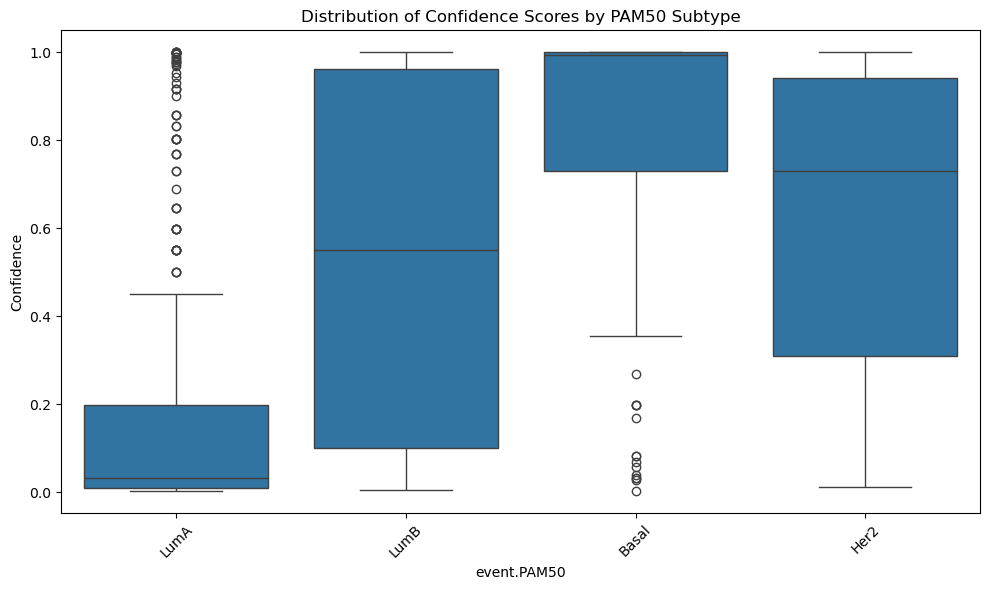

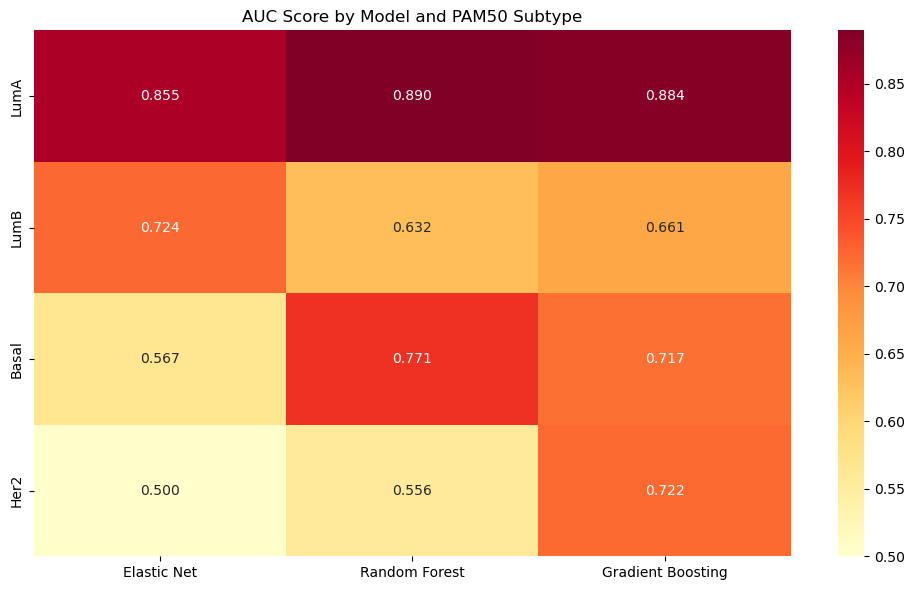

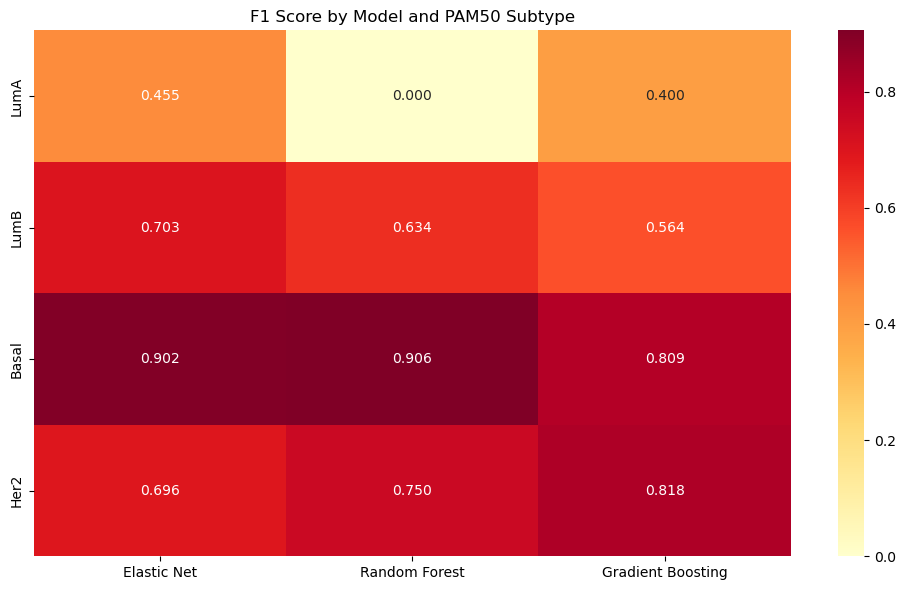

In [ ]:
# Prepare data with binary confidence classes
confidence_threshold = 0.5
y_binary = (brca_df_common['Confidence'] > confidence_threshold).astype(int)

def train_evaluate_by_pam50(X, y, pam50_labels):
    models = {
        'Elastic Net': LogisticRegression(penalty='elasticnet', solver='saga', 
                                        l1_ratio=0.5, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    
    # Split by PAM50 subtype
    pam50_results = {}
    
    for subtype in pam50_labels.unique():
        # Get indices for this subtype
        subtype_mask = (pam50_labels == subtype)
        X_subtype = X[subtype_mask]
        y_subtype = y[subtype_mask]
        
        # Only proceed if we have enough samples
        if len(np.unique(y_subtype)) < 2 or sum(subtype_mask) < 10:
            print(f"Skipping {subtype} due to insufficient samples or class imbalance")
            continue
            
        # Split and scale data
        X_train, X_test, y_train, y_test = train_test_split(
            X_subtype, y_subtype, test_size=0.2, random_state=42, stratify=y_subtype
        )
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train and evaluate models
        subtype_results = {}
        for name, model in models.items():
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            
            # Calculate metrics
            metrics = calculate_metrics(y_test, y_pred, y_pred_proba)
            subtype_results[name] = metrics
            
        pam50_results[subtype] = subtype_results
    
    return pam50_results

# Train and evaluate models for each PAM50 subtype
results = train_evaluate_by_pam50(rnaseq_df_top_genes, y_binary, brca_df_common['event.PAM50'])

# Plot ROC curves for each PAM50 subtype
plt.figure(figsize=(15, 10))
for i, (subtype, subtype_results) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    for name, metrics in subtype_results.items():
        roc = metrics['ROC']
        plt.plot(roc['fpr'], roc['tpr'], 
                label=f'{name} (AUC = {roc["auc"]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{subtype} ROC Curves')
    plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Plot performance metrics for each PAM50 subtype
metrics_to_plot = ['Precision', 'Recall', 'F1', 'MCC']
for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    x = np.arange(len(results))
    width = 0.25
    
    for i, model_name in enumerate(['Elastic Net', 'Random Forest', 'Gradient Boosting']):
        values = [results[subtype][model_name][metric] for subtype in results.keys()]
        plt.bar(x + i*width, values, width, label=model_name)
    
    plt.xlabel('PAM50 Subtypes')
    plt.ylabel(f'{metric} Score')
    plt.title(f'{metric} by PAM50 Subtype')
    plt.xticks(x + width, list(results.keys()), rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Print detailed results for each subtype
for subtype, subtype_results in results.items():
    print(f"\n{'='*50}")
    print(f"Results for {subtype}:")
    print(f"Number of samples: {sum(brca_df_common['event.PAM50'] == subtype)}")
    
    for model_name, metrics in subtype_results.items():
        print(f"\n{model_name}:")
        print(f"Precision: {metrics['Precision']:.3f}")
        print(f"Recall: {metrics['Recall']:.3f}")
        print(f"F1: {metrics['F1']:.3f}")
        print(f"MCC: {metrics['MCC']:.3f}")
        print(f"AUC: {metrics['ROC']['auc']:.3f}")
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])

# Plot distribution of confidence scores by PAM50 subtype
plt.figure(figsize=(10, 6))
sns.boxplot(data=brca_df_common, x='event.PAM50', y='Confidence')
plt.title('Distribution of Confidence Scores by PAM50 Subtype')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a heatmap of model performance across subtypes
performance_data = {
    'AUC': np.zeros((len(results), 3)),
    'F1': np.zeros((len(results), 3))
}

for i, subtype in enumerate(results.keys()):
    for j, model in enumerate(['Elastic Net', 'Random Forest', 'Gradient Boosting']):
        performance_data['AUC'][i, j] = results[subtype][model]['ROC']['auc']
        performance_data['F1'][i, j] = results[subtype][model]['F1']

for metric, data in performance_data.items():
    plt.figure(figsize=(10, 6))
    sns.heatmap(data, 
                annot=True, 
                fmt='.3f',
                xticklabels=['Elastic Net', 'Random Forest', 'Gradient Boosting'],
                yticklabels=list(results.keys()),
                cmap='YlOrRd')
    plt.title(f'{metric} Score by Model and PAM50 Subtype')
    plt.tight_layout()
    plt.show()

In [ ]:
# Check data alignment and print diagnostic information
print("rnaseq_df_top_genes shape:", pcg_400_with_metadata.shape)
print("brca_df_common['Confidence'] shape:", brca_df_common['Confidence'].shape)
print("\nrnaseq_df_top_genes index (first 5):", pcg_400_with_metadata.index[:5].tolist())
print("brca_df_common['Confidence'] index (first 5):", brca_df_common['Confidence'].index[:5].tolist())

# Check for common samples
common_samples = set(pcg_400_with_metadata.index) & set(brca_df_common.index)
print("\nNumber of common samples:", len(common_samples))

rnaseq_df_top_genes shape: (857, 402)
brca_df_common['Confidence'] shape: (857,)

rnaseq_df_top_genes index (first 5): ['TCGA-A1-A0SB', 'TCGA-A1-A0SD', 'TCGA-A1-A0SE', 'TCGA-A1-A0SF', 'TCGA-A1-A0SG']
brca_df_common['Confidence'] index (first 5): ['TCGA-A1-A0SB', 'TCGA-A1-A0SD', 'TCGA-A1-A0SE', 'TCGA-A1-A0SF', 'TCGA-A1-A0SG']

Number of common samples: 857


In [ ]:
### run model on yashwin's shared_de_genes
### run model on dani's expression deconvolution data
### run model on my own high confidence samples from sigmoid, split 80/20 + ambiguous set all for test/cv
### use pytorch to create a neural network model
### pull in new soft confidence file from yashwin's main branch that has all 857 samples

In [ ]:
#i noticed model ran better on the 811 samples, which had dropped samples around the middle of the zone of ambiguity. This shows that the model is more accurate when it we remove ambiguous samples.